<a href="https://colab.research.google.com/github/Fabs00/FOG_AA/blob/main/Tarea_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea en clase

In [3]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/coviddeath.csv")
df

Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin librerías)

Varianza

In [7]:
def calcular_varianza(columna):
    N = len(columna)
    media = sum(columna) / N
    suma_cuadrados_diferencias = sum((x - media) ** 2 for x in columna)
    varianza = suma_cuadrados_diferencias / (N - 1)
    return varianza


In [20]:
columna = df["Number of COVID-19 Deaths"].dropna()
varianza_mano = calcular_varianza(columna)
varianza_mano

11639596.719949335

Desviación estandar

In [25]:
def calcular_desviacion_estandar(columna):
    desviacion_estandar = (varianza_mano)**0.5
    return desviacion_estandar

In [26]:
desviacion_mano = calcular_desviacion_estandar(columna)
desviacion_mano

3411.6853195963627

Sesgo

In [29]:
def calcular_sesgos(columna):
    N = len(columna)
    media = sum(columna) / N
    sesgos = [x - media for x in columna]
    return sesgos

In [ ]:
sesgo = calcular_sesgos(columna)
sesgo

Cuantiles

In [35]:
columna_ordenada = sorted(columna)

In [42]:
largo = len(columna_ordenada)
indice_01 = int (largo * 0.25)
indice_02 = int (largo * 0.5)
indice_03 = int (largo * 0.75)

In [45]:
cuartil_01 = columna_ordenada[indice_01]
cuartil_02 = columna_ordenada[indice_02]
cuartil_03 = columna_ordenada[indice_03]


In [44]:
cuartil_01

24.0

Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

In [ ]:
from scipy.stats import shapiro

stat, p_valor = shapiro(columna)

print("Estadístico de prueba:", stat)
print("Valor p:", p_valor)

nivel_de_significancia = 0.05
if p_valor > nivel_de_significancia:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")


#Tarea

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/covid.csv")

Calcula estadísticos descriptivos básicos para tus datos

<ipython-input-9-48b3e4671b21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Population', y='WHO Region', inner='stick', palette='Dark2')


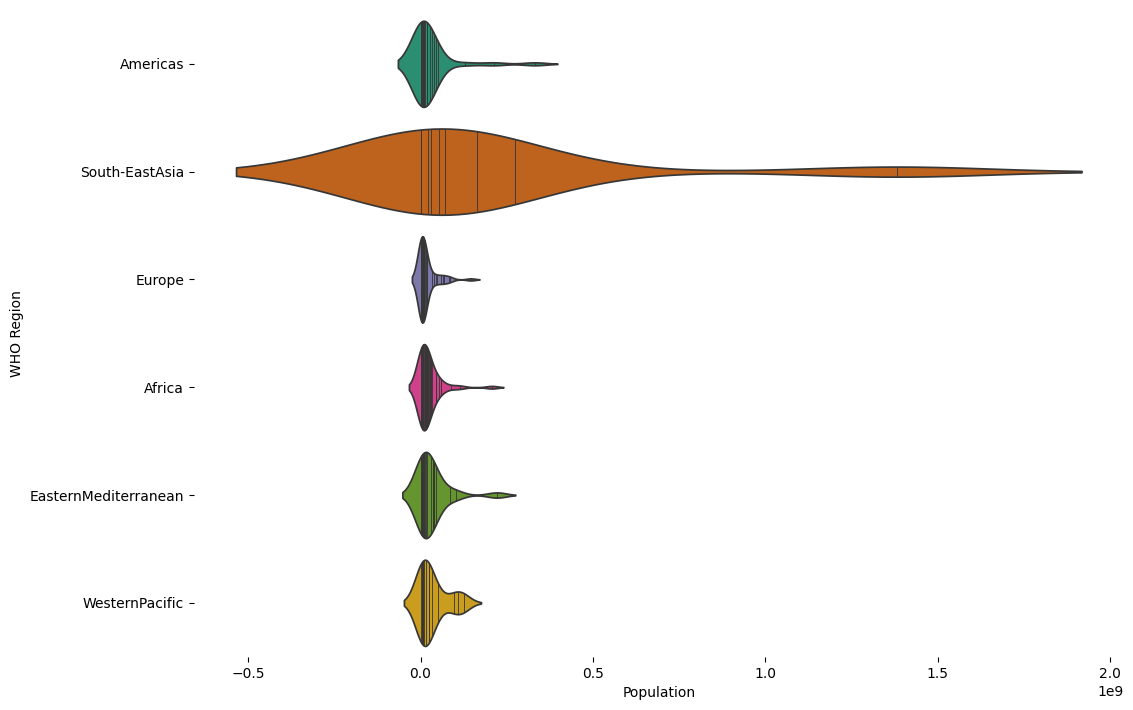

In [9]:
# @title WHO Region vs Population

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['WHO Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Population', y='WHO Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma

In [27]:
df_num = df.select_dtypes(include=["number", "float"])


,TotalCases
0,5032179
1,2917562
2,2025409
3,871894
4,538184
...,...
204,13
205,13
206,13
207,12


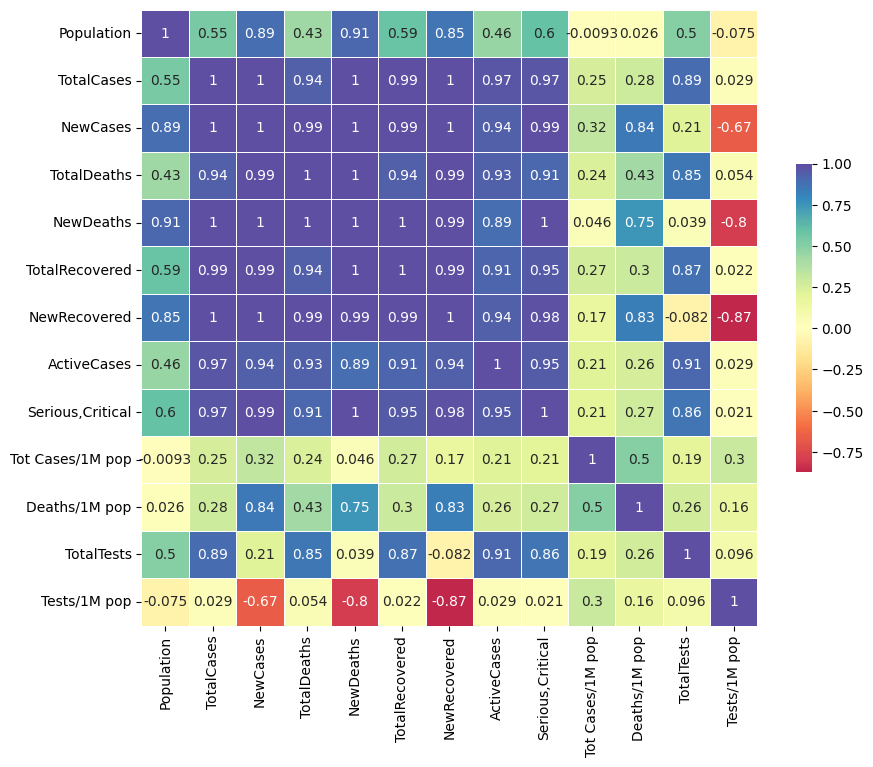

In [31]:
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Podemos visualizar que la mayoría de casos nuevos entraron en un estado serio o critico

También que hubo zonas donde los casos encontrados no reporesntaron apenas inlfuencia sobre la poblacón total o el número de fallecimientos